https://stackoverflow.com/questions/43036711/scikit-learn-svc-predict-probability-doesnt-work-as-expected

https://www.google.com/search?rlz=1C1YTUH_idID941ID941&q=funct_svm(%27poly%27,data+x_train,data+y_train,data+x_test,data+y_test)&spell=1&sa=X&ved=2ahUKEwjOk7LG_J77AhXmzDgGHaSoB30QBSgAegQICRAB&biw=1280&bih=609&dpr=1.5

https://piyut-dyoni.medium.com/machine-learning-buat-yang-ngerasa-bodo-e37bc5b26d9d

https://blog.rosihanari.net/tutorial-python-svm-classification-dan-menampilkan-prediction-report-dengan-confusion-matrix/

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
https://www.google.com/search?q=gridsearchcv+svc&rlz=1C1YTUH_idID941ID941&sxsrf=ALiCzsbOXYAmYuuGmSXI_izQ2wx_1vX5dw%3A1669134113756&ei=Ifd8Y_XvLamN3LUPzNGhmAg&ved=0ahUKEwi1hLuPmcL7AhWpBrcAHcxoCIMQ4dUDCA8&uact=5&oq=gridsearchcv+svc&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIECAAQQzIICAAQBxAeEAoyBQgAEIAEMgUIABCABDIICAAQgAQQywEyBggAEAgQHjIFCAAQhgMyBQgAEIYDMgUIABCGAzIFCAAQhgNKBAhBGABKBAhGGABQAFgAYLcCaABwAXgAgAFmiAFmkgEDMC4xmAEAoAEBwAEB&sclient=gws-wiz-serp
https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10
https://medium.com/purwadhikaconnect/statistik-dasar-untuk-data-scientist-part-1-af7ee6999911
https://www.youtube.com/watch?v=G7xRVW9CfHY&t=3s
https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,Effective%20in%20high%20dimensional%20spaces.
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451#:~:text=lbfgs%20%E2%80%94%20Stands%20for%20Limited%2Dmemory,updates%2C%20so%20it%20saves%20memory.
https://python-course.eu/machine-learning/neural-networks-with-scikit.php

In [ ]:
import time
start_time = time.time()
import pandas as pd #return a data frame (like a spreadsheet)
df=pd.read_csv("/content/skripsi.csv")
df.head()

,ips_1,ips_2,ips_3,ips_4,ips_5,ips_6,ipk_6,sks_1,sks_2,sks_3,sks_4,sks_5,sks_6,sks_kom_6,nominal_ukt,penghasilan_ortu,Buleleng,Luar_Buleleng,Luar_Bali,label
0,2.29,2.69,3.15,2.87,3.14,3.29,2.905000,24,16,20,23,21,24,128,2550000,500000,0,0,1,1
1,3.46,3.56,3.20,3.63,3.54,3.59,3.496667,24,22,22,21,24,22,135,2550000,5000000,1,0,0,0
2,3.65,3.66,3.51,3.51,3.63,3.54,3.583333,22,23,24,22,21,21,133,2600000,2600000,0,0,1,1
3,3.08,2.81,3.47,3.20,3.60,3.00,3.193333,23,20,20,23,24,20,130,2400000,1000000,1,0,0,0
4,3.54,3.58,3.19,3.29,3.57,3.56,3.455000,23,24,22,22,23,22,136,2550000,2000000,0,0,1,1


In [ ]:
#Checking the types of the dataset
df.dtypes

ips_1               float64
ips_2               float64
ips_3               float64
ips_4               float64
ips_5               float64
ips_6               float64
ipk_6               float64
sks_1                 int64
sks_2                 int64
sks_3                 int64
sks_4                 int64
sks_5                 int64
sks_6                 int64
sks_kom_6             int64
nominal_ukt           int64
penghasilan_ortu      int64
Buleleng              int64
Luar_Buleleng         int64
Luar_Bali             int64
label                 int64
dtype: object

In [ ]:
#Chek the null values for each features
df.isnull().sum()

ips_1               0
ips_2               0
ips_3               0
ips_4               0
ips_5               0
ips_6               0
ipk_6               0
sks_1               0
sks_2               0
sks_3               0
sks_4               0
sks_5               0
sks_6               0
sks_kom_6           0
nominal_ukt         0
penghasilan_ortu    0
Buleleng            0
Luar_Buleleng       0
Luar_Bali           0
label               0
dtype: int64

Data Cleaning

In [ ]:
#Copy the raw dataset
clean_data = df.copy()

In [ ]:
clean_data.shape

(3280, 20)

Removing Outliers

In [ ]:
# from google.colab.output import clear
# #Ploting Outliers
# def plot_boxplot(df,ft):
#   df.boxplot(column=[ft])
#   plt.grid(False)
#   plt.show

In [ ]:
# import matplotlib.pyplot as plt
# plot_boxplot(clean_data,'penghasilan_ortu')

In [ ]:
# #Finding Outliers
# def outliers(df, ft):
#   Q1 = df[ft].quantile(0.25)
#   Q3 = df[ft].quantile(0.75)
#   IQR = Q3 - Q1

#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   ls = df.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]

#   # ls = df.index[(df[ft]> lower_bound) & (df[ft]< upper_bound)]

#   return ls

In [ ]:
# #Saving the Index of Outliers
# index_list = []
# for feature in ['penghasilan_ortu']:

#   index_list.extend(outliers(clean_data, feature))

In [ ]:
# # Index of The Outliers
# index_list

In [ ]:
# #Removing Outliers
# def remove(df,ls):
#   ls = sorted(set(ls))
#   df = df.drop(ls)
#   return df

In [ ]:
# #Saving A New Cleaned Dataset
# df_cleaned = remove(clean_data, index_list)

In [ ]:
#Checking Number of The New Dataset
# df_cleaned.shape

In [ ]:
# # #saving the dataframe
# df_cleaned.to_csv('testing.csv')

In [ ]:
#Ploting Dataset Without Outliers
# plot_boxplot(df_cleaned,'penghasilan_ortu')

Data Visualization

In [ ]:
# import seaborn as sns
# #Kernel Density Estimation
# sns.pairplot(df_cleaned, diag_kind='kde', hue='label');

In [ ]:
# import seaborn as sns
# base_color = sns.color_palette()[0]
# sns.countplot(data = df_cleaned, x = 'label', color = base_color);

In [ ]:
korelasi = clean_data.corr()
korelasi

,ips_1,ips_2,ips_3,ips_4,ips_5,ips_6,ipk_6,sks_1,sks_2,sks_3,sks_4,sks_5,sks_6,sks_kom_6,nominal_ukt,penghasilan_ortu,Buleleng,Luar_Buleleng,Luar_Bali,label
ips_1,1.000000,0.767238,0.701920,0.666454,0.666172,0.662684,0.857688,0.031939,0.393075,0.338886,0.222870,0.236298,-0.163950,0.296309,-0.017225,0.263984,0.233436,0.167100,-0.370343,-0.578554
ips_2,0.767238,1.000000,0.702292,0.673249,0.680920,0.640798,0.863517,0.049608,0.376819,0.476677,0.290561,0.245265,-0.168923,0.364232,-0.017722,0.227439,0.218896,0.156110,-0.346776,-0.512712
ips_3,0.701920,0.702292,1.000000,0.759576,0.736112,0.735478,0.894031,0.083130,0.300171,0.343533,0.380499,0.302476,-0.101031,0.392187,-0.000402,0.287068,0.327243,0.127867,-0.427938,-0.692277
ips_4,0.666454,0.673249,0.759576,1.000000,0.678574,0.689611,0.860483,0.064681,0.300526,0.335175,0.277854,0.375036,-0.071172,0.393616,0.014327,0.261692,0.309663,0.108251,-0.394016,-0.641472
ips_5,0.666172,0.680920,0.736112,0.678574,1.000000,0.712413,0.861045,0.044902,0.329904,0.388172,0.275860,0.288775,-0.085805,0.379154,0.004460,0.249763,0.265403,0.165801,-0.400321,-0.603452
ips_6,0.662684,0.640798,0.735478,0.689611,0.712413,1.000000,0.854058,0.081352,0.320295,0.334407,0.243874,0.296389,-0.094628,0.353281,-0.003016,0.270132,0.321398,0.129924,-0.424016,-0.673970
ipk_6,0.857688,0.863517,0.894031,0.860483,0.861045,0.854058,1.000000,0.068752,0.389045,0.428735,0.327230,0.335867,-0.132360,0.420486,-0.003844,0.300111,0.322599,0.164524,-0.454855,-0.712287
sks_1,0.031939,0.049608,0.083130,0.064681,0.044902,0.081352,0.068752,1.000000,-0.197861,-0.135477,-0.319544,-0.034847,0.216619,0.165966,0.011225,0.076604,0.253935,-0.034496,-0.217400,-0.070787
sks_2,0.393075,0.376819,0.300171,0.300526,0.329904,0.320295,0.389045,-0.197861,1.000000,0.536616,0.329317,0.254695,-0.326096,0.442667,-0.023020,0.098555,0.047374,0.155523,-0.179447,-0.234983
sks_3,0.338886,0.476677,0.343533,0.335175,0.388172,0.334407,0.428735,-0.135477,0.536616,1.000000,0.505536,0.356311,-0.251137,0.601626,-0.019612,0.035428,0.092695,0.187546,-0.250989,-0.165781


In [ ]:
# korelasi.to_csv('korelasi.csv')

SVM

In [ ]:
X = clean_data.drop('label', axis = 1).copy() #X is data we want to use to make predictions
X.head()

,ips_1,ips_2,ips_3,ips_4,ips_5,ips_6,ipk_6,sks_1,sks_2,sks_3,sks_4,sks_5,sks_6,sks_kom_6,nominal_ukt,penghasilan_ortu,Buleleng,Luar_Buleleng,Luar_Bali
0,2.29,2.69,3.15,2.87,3.14,3.29,2.905000,24,16,20,23,21,24,128,2550000,500000,0,0,1
1,3.46,3.56,3.20,3.63,3.54,3.59,3.496667,24,22,22,21,24,22,135,2550000,5000000,1,0,0
2,3.65,3.66,3.51,3.51,3.63,3.54,3.583333,22,23,24,22,21,21,133,2600000,2600000,0,0,1
3,3.08,2.81,3.47,3.20,3.60,3.00,3.193333,23,20,20,23,24,20,130,2400000,1000000,1,0,0
4,3.54,3.58,3.19,3.29,3.57,3.56,3.455000,23,24,22,22,23,22,136,2550000,2000000,0,0,1


In [ ]:
y = clean_data['label'].copy() #y is the data we want to predict
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [ ]:
import numpy as np
X_numpy = X.to_numpy()
y_numpy = y.to_numpy()

In [ ]:
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.svm import SVC
# clf_svm = SVC(kernel='poly', C=5, gamma='scale')
# model_svm = CalibratedClassifierCV(clf_svm)
# model_svm.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(10,10), activation='identity')
clf = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(25, 10), random_state = None, activation='identity')

#{'logistic', 'relu', 'tanh', 'identity'}
#5,2
#solver = each solver tries to find the parameter weights that minimize a cost function ('lbfgs' mean stores only the last few updates, so it saves memory/ this is teh default)
#alpha =  helps in avoiding overfitting by penalizing weights with large magnitudes (1e-5 is default)
#activation = how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network

In [ ]:
print(clf)

MLPClassifier(activation='identity', hidden_layer_sizes=(25, 10),
              solver='lbfgs')


In [ ]:
#PLOT ECONFUSION MATRIX AND ROC FOR EACH FOLDS
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score

# Making an object for scaler
scaler = MinMaxScaler()
accuracies = []
confusion_matrices = []
probabilities = []
labels = []
trained_models = []
# Assuming you have your classifier/model instantiated as 'clf'
# Assuming you have your features in 'X' and labels in 'y'


#K-FOLD BIASA
kf = KFold(n_splits=10, shuffle = True, random_state = 40)
# kf.get_n_splits(X_numpy)


# for train_index, test_index in kf.split(X_numpy):

# Iterate over each fold
# for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):

for i, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X_numpy[train_index], X_numpy[test_index]
    y_train, y_test = y_numpy[train_index], y_numpy[test_index]

    # Scaling dataset
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Training
    clf.fit(X_train, y_train)


    # Predict probabilities for the test data
    y_proba = clf.predict_proba(X_test)[::,1]
    y_pred = clf.predict(X_test)

    # Append the trained model to the list
    trained_models.append(clf)


    probabilities.append(y_proba)
    labels.append(y_test)

    # Compute the confusion matrix for the current fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)



    # Calculate and print accuracy, precision, recall, and F1 score for the current fold
    accuracy = metrics.accuracy_score(y_test, y_pred)


    print(f"Fold {i}:")
    print("Accuracy:", accuracy)
    print()


    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

Fold 1:
Accuracy: 0.9298780487804879



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 2:
Accuracy: 0.9512195121951219

Fold 3:
Accuracy: 0.948170731707317

Fold 4:
Accuracy: 0.9390243902439024

Fold 5:
Accuracy: 0.9298780487804879

Fold 6:
Accuracy: 0.948170731707317

Fold 7:
Accuracy: 0.9329268292682927



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 8:
Accuracy: 0.9542682926829268

Fold 9:
Accuracy: 0.9329268292682927

Fold 10:
Accuracy: 0.9512195121951219



In [ ]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,

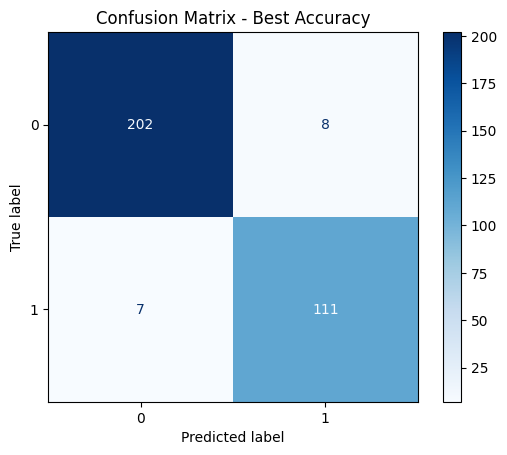

Best Accuracy: 0.9542682926829268


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the best_fold_index and best_accuracy calculated
best_fold_index = np.argmax(accuracies)
best_accuracy = accuracies[best_fold_index]

# Get the confusion matrix of the best fold
best_cm = confusion_matrices[best_fold_index]

# Create a ConfusionMatrixDisplay object for the best confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=best_cm, display_labels=['0', '1'])

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix - Best Accuracy')
plt.show()

# Print the best accuracy
print("Best Accuracy:", best_accuracy)

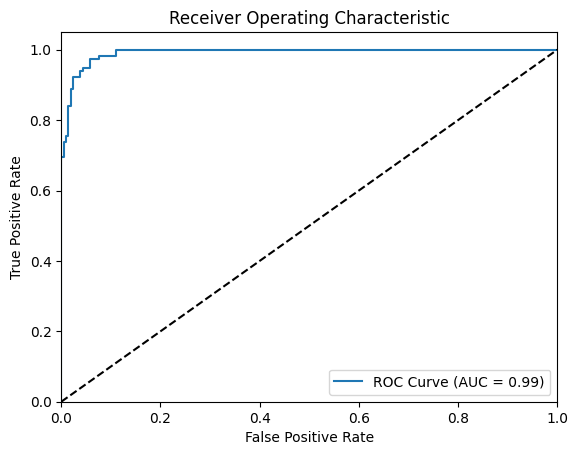

In [ ]:
# Get the predicted probabilities and labels of the best fold
best_probabilities = probabilities[best_fold_index]
best_labels = labels[best_fold_index]

# Compute the false positive rate (FPR), true positive rate (TPR), and threshold for ROC curve
fpr, tpr, thresholds = roc_curve(best_labels, best_probabilities)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

best_model = trained_models[best_fold_index]  # trained_models is a list of models trained on each fold

with open('best_model.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Load the model from the file
with open('best_model.pickle', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Load the X_test file
df_X_test = pd.read_csv('X_test.csv')

# Convert the data to a NumPy array
X_testing = df_X_test.values


# Load the y_test file
df_y_test = pd.read_csv('y_test.csv')

# Convert the data to a NumPy array
y_testing = df_y_test.values

# Assuming model is your trained model
y_predict = loaded_model.predict(X_testing)


In [ ]:
y_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
df = pd.DataFrame(y_predict)

df.to_csv('y_predict.csv')

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_testing, y_predict)
cnf_matrix

array([[490,   0],
       [133, 197]])

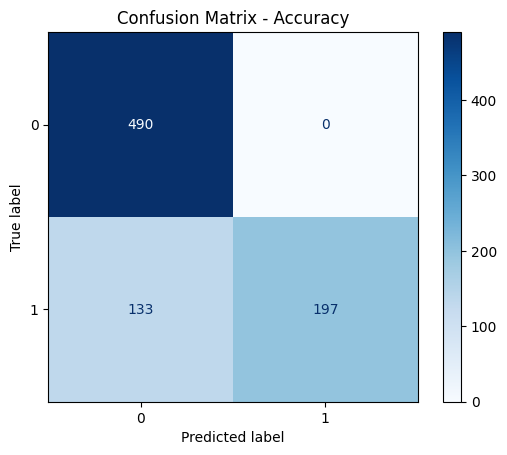

Accuracy: 0.837805


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Create a ConfusionMatrixDisplay object for the best confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['0', '1'])

# Plot the confusion matrix
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix - Accuracy')
plt.show()

from sklearn import metrics
accuracy = metrics.accuracy_score(y_testing,y_predict)
print("Accuracy: %.6f" % accuracy)

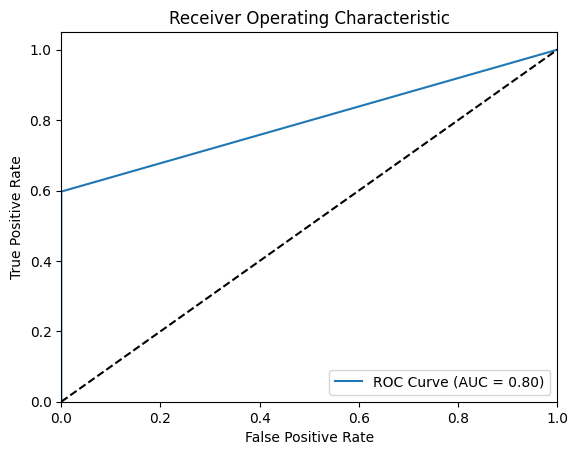

In [ ]:
# Predict probabilities for the test data
y_prbb = loaded_model.predict_proba(X_testing)[::,1]


# Compute the false positive rate (FPR), true positive rate (TPR), and threshold for ROC curve
fpr, tpr, thresholds = roc_curve(y_testing, y_prbb)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
end_time = time.time()

In [ ]:
runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")

Total runtime: 9.34140133857727 seconds
